# $D_{s1}(2460)^+\to D_s^+\gamma$ production study
## Yields
### Data analysis
#### Event Mixing algorithm for $D_s^+\gamma$ final state

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sys
import os
import vector as vec
import itertools as iter
ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyShort as rsh

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()

%jsroot on

print(datetime.now())

Welcome to JupyROOT 6.26/06
-------------------------
Set LHCb Style - May 2021
-------------------------
2023-09-29 11:41:55.375301


In [2]:
if not os.path.exists("./Graphs"):
    os.makedirs("./Graphs")
else:
    print("Graphs directory already exists")

if not os.path.exists("./root_files"):
    os.makedirs("./root_files")
else:
    print("root_files directory already exists")    

Graphs directory already exists
root_files directory already exists


## RDataFrame definition

In [3]:
Data_MagU18_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/Data/MagUp/2018/'
Data_MagD18_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/Data/MagDown/2018/'
Data_MagD17_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/Data/MagDown/2017/'

Data_files = "DsJ_*_28.root"
dtt = "DsGammaTuple"

nfiles = len(os.listdir(Data_MagU18_path))

data_for_train = set([Data_MagU18_path+"DsJ_Data_MagU18_"+str(i)+".root" for i in range(int(nfiles/100))])

tdf_data = ROOT.RDataFrame(dtt+"/DecayTree", data_for_train)

#tdf_data = ROOT.RDataFrame(dtt+"/DecayTree", Data_MagU18_path+Data_files)

tdf_data = tdf_data.Define("DsgM","Dsg_M-Ds_M+1969")

sel = "gamma_PT > 1100 && gamma_CL > 0.7 && abs(Ds_M-1969)<20 && nPVs==1"

tdf_data = tdf_data.Filter(sel)

## $\mathtt{pd.DataFrame}$ conversion

(array([  87.,   96.,  115.,   95.,  115.,  118.,  142.,  130.,  171.,
         195.,  221.,  254.,  316.,  362.,  420.,  432.,  524.,  603.,
         689.,  763.,  841., 1035., 1056., 1147., 1338., 1437., 1458.,
        1555., 1602., 1613., 1658., 1573., 1544., 1555., 1430., 1299.,
        1232., 1045., 1018.,  943.,  795.,  729.,  630.,  545.,  465.,
         397.,  372.,  263.,  258.,  258.,  168.,  178.,  144.,  143.,
         118.,  135.,   93.,   90.,   96.,   85.]),
 array([1949.01853506, 1949.68484358, 1950.3511521 , 1951.01746062,
        1951.68376914, 1952.35007766, 1953.01638618, 1953.6826947 ,
        1954.34900322, 1955.01531174, 1955.68162026, 1956.34792878,
        1957.0142373 , 1957.68054582, 1958.34685434, 1959.01316286,
        1959.67947138, 1960.3457799 , 1961.01208842, 1961.67839694,
        1962.34470546, 1963.01101398, 1963.6773225 , 1964.34363102,
        1965.00993954, 1965.67624806, 1966.34255658, 1967.0088651 ,
        1967.67517362, 1968.34148214, 1969.007

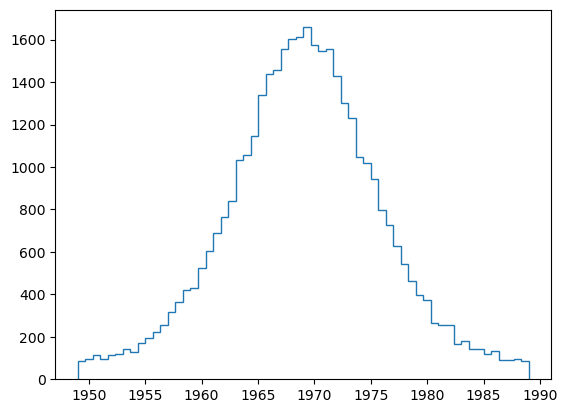

In [4]:
columns = ["runNumber","eventNumber", "totCandidates", "nCandidate", "nVeloTracks", "nPVs", "gamma_PE", "gamma_PX", "gamma_PY", "gamma_PZ", "gamma_PT","gamma_M",
           "Ds_PE", "Ds_PX", "Ds_PY", "Ds_PZ", "Ds_PT","Ds_M", "DsgM", "Dsg_M"]

df = rsh.rdf_to_pdf(tdf_data, columns)

plt.hist(pd.unique(df["Ds_M"]), bins=60, histtype="step")

### $\mathtt{runNumber}$ check

In [5]:
runNumber = df["runNumber"]

runs = pd.unique(runNumber)

print("Number of runs in our data :", len(runs))
print("Runs of our data :", runs)

events_in_1_run = pd.unique((df.query("runNumber=={0}".format(runs[0])))["eventNumber"])

for i in range(len(runs)):
    print("----------------------------------------------------------------------------")
    events_in_1_run = pd.unique((df.query("runNumber=={0}".format(runs[i])))["eventNumber"])
    print("Number of Events in run = {0} :".format(runs[i]), len(events_in_1_run))
print("----------------------------------------------------------------------------")

# 213283 : 183


Number of runs in our data : 70
Runs of our data : [211588 211432 211843 216294 216675 216788 211618 211770 211682 211616
 212203 212259 211759 211621 212027 211941 211904 211762 211607 211660
 211429 211620 211813 211612 211666 211692 211954 211947 211821 211514
 211625 211825 216094 208172 207735 212992 208037 211615 211419 212922
 207308 211622 211611 211824 212222 216835 207466 211769 211416 211609
 211632 212205 212312 216761 212094 211699 211685 216679 208478 213385
 211840 211558 211756 211950 211955 211669 211630 211624 211554 211691]
----------------------------------------------------------------------------
Number of Events in run = 211588 : 850
----------------------------------------------------------------------------
Number of Events in run = 211432 : 422
----------------------------------------------------------------------------
Number of Events in run = 211843 : 1253
----------------------------------------------------------------------------
Number of Events in run =

### Number of $D_s^+$ and $\pi^0$ in 1 run

In [6]:
eventNumber = pd.unique((df.query("runNumber=={0}".format(runs[0])))["eventNumber"])

evt = rsh.CompactEvent_def(df, runs[0], eventNumber[0], parts_names=["Ds", "gamma"])

evt

Event 2289840993 in run 211588
nPVs = 1
nVeloTracks = 98
Particles:
{'Ds': [Ds Particle: MomentumObject4D(px=5035.1, py=-60.36, pz=80063.97, E=80246.40029465807)], 'gamma': [gamma Particle: MomentumObject4D(px=1295.4, py=-358.46, pz=17466.75, E=17518.387776679112)]}

### Event mixing try

In [7]:
Total_Dsgamma_mixed_M = [ ]

for i in range(len(runs)):
    
    events_in_run = rsh.events_in_1_run(df, runs[i], parts_names = ["Ds", "gamma"])

    Dsgamma_mixed_M = (rsh.event_mixing(events_in_run, 1300, parts_names=["Ds", "gamma"]))["Dsgamma_MM"]
    
    Total_Dsgamma_mixed_M += Dsgamma_mixed_M

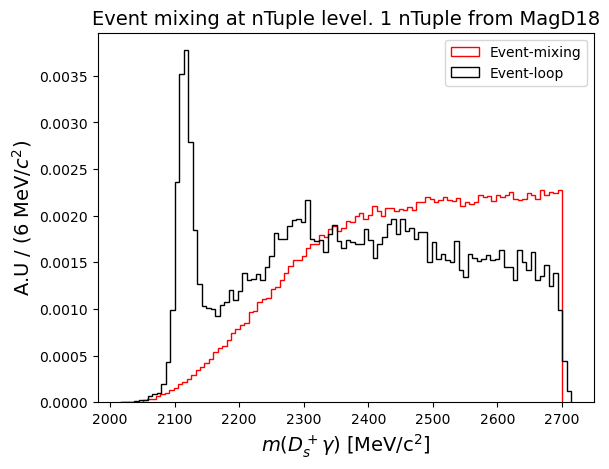

In [8]:
plt.hist([Total_Dsgamma_mixed_M[i] for i in range(len(Total_Dsgamma_mixed_M)) if Total_Dsgamma_mixed_M[i] < 2700], bins=100, histtype="step", color="red", density=True, label="Event-mixing")
plt.hist(df.query("DsgM < 2700")["Dsg_M"], bins=100, histtype="step", color="black", density=True, label="Event-loop")
plt.legend()
plt.title("Event mixing at nTuple level. 1 nTuple from MagD18", fontsize = 14)
plt.xlabel(r"$m(D_s^+\gamma)$ [$\mathrm{MeV/c^2}$]", fontsize = 14)
plt.ylabel(r"A.U / (6 MeV/$c^2$)", fontsize = 14)
plt.savefig("Graphs/Exp_MagD18_DsgL_mass_evt_mix.pdf", dpi=300, bbox_inches = 'tight')

In [9]:
evt_mix_mass_dict = {"Dsg_M_evt_mix": [Total_Dsgamma_mixed_M[i] for i in range(len(Total_Dsgamma_mixed_M)) if Total_Dsgamma_mixed_M[i] < 2700]}

evt_mix_mass_df = pd.DataFrame(evt_mix_mass_dict)
evt_mix_mass_tdf = rsh.pdf_to_rdf(evt_mix_mass_df)

evt_mix_mass_histo = evt_mix_mass_tdf.Histo1D(("","",100,2000,2800), "Dsg_M_evt_mix")

c1 = ROOT.TCanvas("", "", 800, 600)
rsh.TH1D_plot(evt_mix_mass_histo, xlabel="Dsg_mass", color=2)
c1.Draw()

rsh.save_hist_to_root(evt_mix_mass_histo, file_name="root_files/MagU18_Dsg_mass_evt_mix_histo.root")